In [3]:
import pysm3
import pysm3.units as u
import astropy.io.fits as fits

import healpy as hp
from fgbuster import (CMB, Dust, Synchrotron,
                      basic_comp_sep,
                      get_observation, get_noise_realization, get_instrument, get_sky)
from fgbuster.visualization import corner_norm


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import sys
sys.path.append('/home/rguidetti')

from PolAngle import *
from beam import * 
from map import *
from convolution import * 
from beam_class import *
from PatchFunctions import *  # nuove funzioni in quanto quelle vecchie lavoravano con mappe NxN. Queste funzionano per mappe rettangolari Nx,Ny

In [161]:
# leggo patches a varie frequenze
patch2d_I40 = fits.getdata("patch2d/patch2d_I40")
patch2d_Q40 = fits.getdata("patch2d/patch2d_Q40")
patch2d_U40 = fits.getdata("patch2d/patch2d_U40")

patch2d_I60 = fits.getdata("patch2d/patch2d_I60")
patch2d_Q60 = fits.getdata("patch2d/patch2d_Q60")
patch2d_U60 = fits.getdata("patch2d/patch2d_U60")


patch2d_I68 = fits.getdata("patch2d/patch2d_I68")
patch2d_Q68 = fits.getdata("patch2d/patch2d_Q68")
patch2d_U68 = fits.getdata("patch2d/patch2d_U68")


patch2d_I78 = fits.getdata("patch2d/patch2d_I78")
patch2d_Q78 = fits.getdata("patch2d/patch2d_Q78")
patch2d_U78 = fits.getdata("patch2d/patch2d_U78")


patch2d_I89 = fits.getdata("patch2d/patch2d_I89")
patch2d_Q89 = fits.getdata("patch2d/patch2d_Q89")
patch2d_U89 = fits.getdata("patch2d/patch2d_U89")


patch2d_I100 = fits.getdata("patch2d/patch2d_I100")
patch2d_Q100 = fits.getdata("patch2d/patch2d_Q100")
patch2d_U100 = fits.getdata("patch2d/patch2d_U100")

patch2d_I119 = fits.getdata("patch2d/patch2d_I119")
patch2d_Q119 = fits.getdata("patch2d/patch2d_I119")
patch2d_U119 = fits.getdata("patch2d/patch2d_I119")

patch2d_I140 = fits.getdata("patch2d/patch2d_I140")
patch2d_Q140 = fits.getdata("patch2d/patch2d_I140")
patch2d_U140 = fits.getdata("patch2d/patch2d_I140")

In [162]:
# component separation
patch1d_I40 = patch2d_I40.flatten()
patch1d_Q40 = patch2d_Q40.flatten()
patch1d_U40 = patch2d_U40.flatten()

patch1d_I60 = patch2d_I60.flatten()
patch1d_Q60 = patch2d_Q60.flatten()
patch1d_U60 = patch2d_U60.flatten()

patch1d_I68 = patch2d_I68.flatten()
patch1d_Q68 = patch2d_Q68.flatten()
patch1d_U68 = patch2d_U68.flatten()

patch1d_I78 = patch2d_I78.flatten()
patch1d_Q78 = patch2d_Q78.flatten()
patch1d_U78 = patch2d_U78.flatten()

patch1d_I89 = patch2d_I89.flatten()
patch1d_Q89 = patch2d_Q89.flatten()
patch1d_U89 = patch2d_U89.flatten()

patch1d_I100 = patch2d_I100.flatten()
patch1d_Q100 = patch2d_Q100.flatten()
patch1d_U100 = patch2d_U100.flatten()

patch1d_I119 = patch2d_I119.flatten()
patch1d_Q119 = patch2d_Q119.flatten()
patch1d_U119 = patch2d_U119.flatten()

patch1d_I140 = patch2d_I140.flatten()
patch1d_Q140 = patch2d_Q140.flatten()
patch1d_U140 = patch2d_U140.flatten()

In [163]:
# devo ritornare ad avere elementi del tipo (6, 3, n_pix)
freq40 = np.stack([patch1d_I40, patch1d_Q40, patch1d_U40])
freq60 = np.stack([patch1d_I60, patch1d_Q60, patch1d_U60])
freq68 = np.stack([patch1d_I68, patch1d_Q68, patch1d_U68])
freq78 = np.stack([patch1d_I78, patch1d_Q78, patch1d_U78])
freq89 = np.stack([patch1d_I89, patch1d_Q89, patch1d_U89])
freq100 = np.stack([patch1d_I100, patch1d_Q100, patch1d_U100])
freq119 = np.stack([patch1d_I119, patch1d_Q119, patch1d_U119])
freq140 = np.stack([patch1d_I140, patch1d_Q140, patch1d_U140])

full_array = np.array([freq40, freq60, freq68, freq78, freq89, freq100, freq119, freq140])
np.shape(full_array)

(8, 3, 480000)

In [165]:
instrument = get_instrument('LiteBIRD')

df   = pd.DataFrame(instrument)
freq = df.iloc[[0, 2, 3, 4, 5, 6, 7, 8], :]   #estraggo le frequenze che ho selezionato creando le patch

components = [CMB(), Dust(350.), Synchrotron(40.)]

# component separation
result = basic_comp_sep(components, freq, full_array)


cmb_I  = result.s[0,0]
cmb_Q  = result.s[0,1]
cmb_U  = result.s[0,2]

In [172]:
np.shape(cmb_I)

(480000,)

In [179]:
# ritrasformo in 2d
x = np.sqrt(len(cmb_I)*2)
int(x)

979

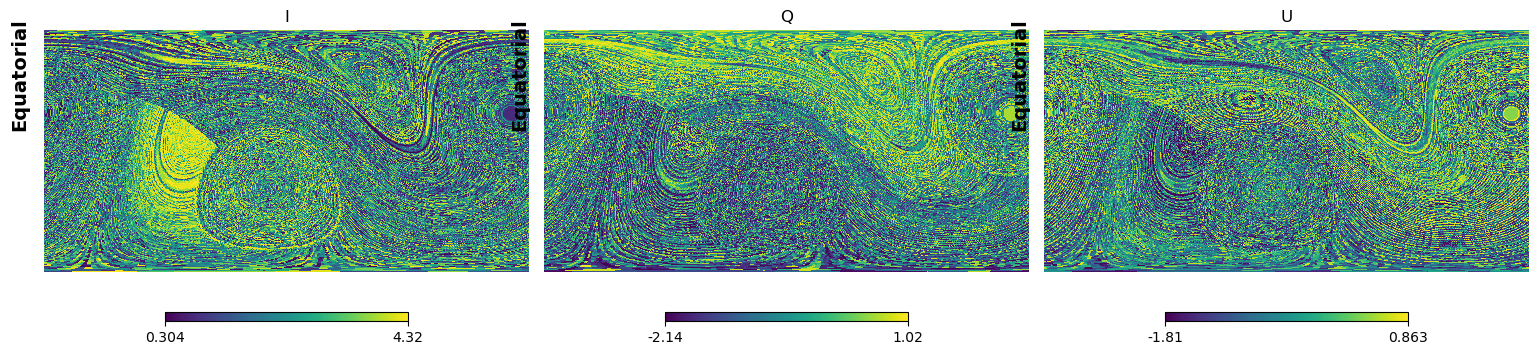

In [178]:
plt.figure(figsize=(15, 5))
cmb_I_2d = hp.cartview(cmb_I, coord=['G','C'], return_projected_map=True, xsize=x,norm='hist', title="I", sub=(1, 3, 1))
cmb_Q_2d = hp.cartview(cmb_Q, coord=['G','C'], return_projected_map=True, xsize=x,norm='hist', title="Q", sub=(1, 3, 2))
cmb_U_2d = hp.cartview(cmb_U, coord=['G','C'], return_projected_map=True, xsize=x,norm='hist', title="U", sub=(1, 3, 3))


In [180]:
np.shape(cmb_I_2d)

(490, 979)

In [181]:
# la taglio quadrata
cmb_I_2d = cmb_I_2d[:490, :600]
cmb_Q_2d = cmb_Q_2d[:490, :600]
cmb_U_2d = cmb_U_2d[:490, :600]

np.shape(cmb_I_2d)

(490, 600)

In [186]:
# gradezza patch
nside    = 4096
pix_size = 0.8588716029543515 #arcmin

Nx = 600
Ny = 490


X_width = Nx * pix_size/60
Y_width = Ny * pix_size/60

# color map
c_min, c_max     = -10, 10      


print(f"Patch con {Nx} x {Ny} pixels, ognuno di {pix_size} arcmin, per una dimensione totale di {X_width:.2f} x {Y_width:.2f} gradi")

Patch con 600 x 490 pixels, ognuno di 0.8588716029543515 arcmin, per una dimensione totale di 8.59 x 7.01 gradi


### Beam

ellipticity =  -0.3333333333333333


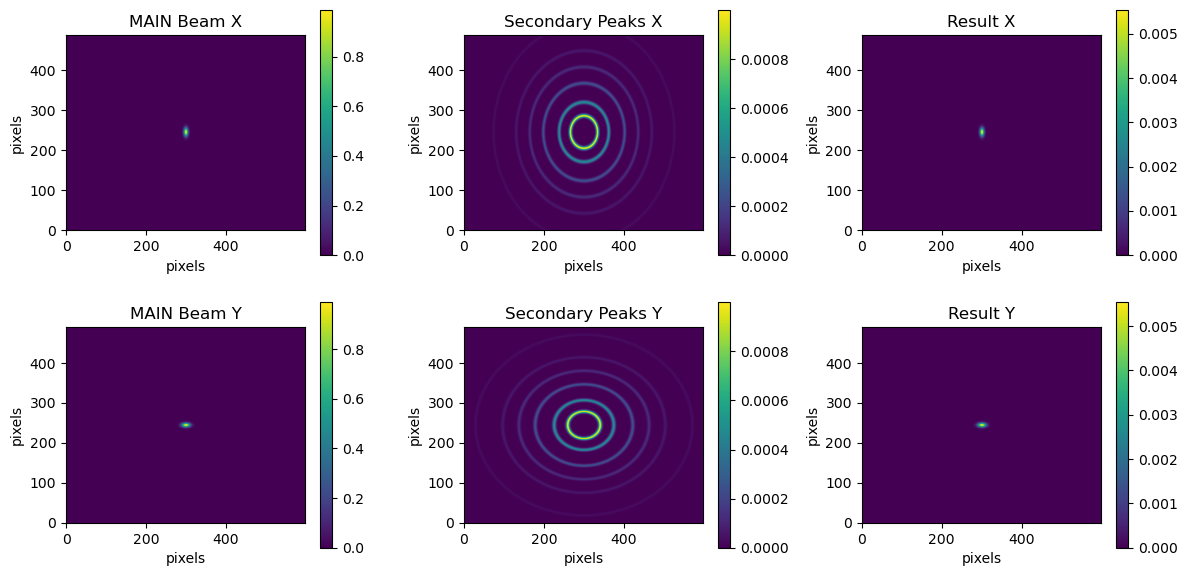

In [187]:
# COORDINATES LIKE THE ONES OF THE MAPS

Nx = int(Nx)
Ny = int(Ny)

onesx = np.ones(Nx)
onesy = np.ones(Ny)

indsx = (np.arange(Nx)+.5 - Nx/2.) * pix_size
indsy = (np.arange(Ny)+.5 - Ny/2.) * pix_size

#X = np.outer(onesy, indsx)
#Y = np.outer(indsy, onesx)
X = np.outer(onesy, indsx)
Y = np.outer(indsy, onesx)
R = np.sqrt(X**2. + Y**2.)


#####################################################################################

# VARIABLES

FWHM_x = 15  #degrees
FWHM_y = 30  #degrees
ellipticity = (FWHM_x - FWHM_y) / (FWHM_x + FWHM_y)
print("ellipticity = ", ellipticity)

array_dB = np.array([-20, -22,  -24, -26, -28, -30])  #max values of the secondary peaks
array_dB = array_dB * 1.5
r1 = np.array([30, 55, 90, 120, 150, 200]) #angular distance of the peaks
r = 4 # width of the rings

theta = 0 # angle of rotation of the beam
a = 1 # major axis of ellipses 


#########################################################################################

# BEAM

beam_gauss_x, beam_gauss_y, sec_rings_x,sec_rings_y, beam_x, beam_y = create_beam_secpeaks(pix_size, FWHM_x, FWHM_y, theta, array_dB, r, r1, X, Y, a, ellipticity)

########################################################################################

# PLOT

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
titles = ['MAIN Beam X', 'Secondary Peaks X', 'Result X', 'MAIN Beam Y', 'Secondary Peaks Y', 'Result Y']
data_list = [beam_gauss_x, sec_rings_x, beam_x, beam_gauss_y, sec_rings_y, beam_y]

for i, ax in enumerate(axes.flat):
    im = ax.imshow(data_list[i], cmap='viridis', origin='lower')
    ax.set_title(titles[i])
    ax.set_xlabel('pixels')
    ax.set_ylabel('pixels')
    cbar = plt.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

beam max: 4.342923104481638e-05 beam min: 4.287753079317196
beam max: 4.342923104481638e-05 beam min: 4.295842396497097


0

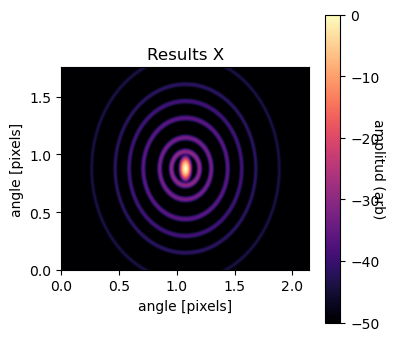

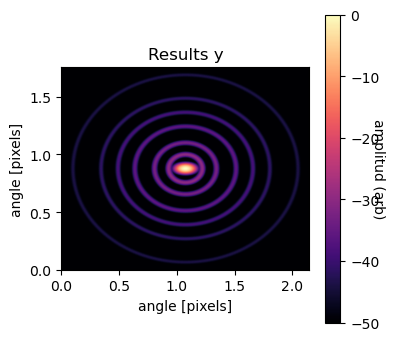

In [188]:
beam_to_plot = beam_x
beam_to_plot = beam_to_plot / np.max(beam_to_plot) + 1e-5
beam_to_plot = 10. * np.log10(beam_to_plot)
Plot_beam_rectangular(beam_to_plot,np.min(beam_to_plot),np.max(beam_to_plot),X_width/4, Y_width/4, "Results X", "angle [pixels]")

beam_to_plot = beam_y
beam_to_plot = beam_to_plot / np.max(beam_to_plot) + 1e-5
beam_to_plot = 10. * np.log10(beam_to_plot)
Plot_beam_rectangular(beam_to_plot,np.min(beam_to_plot),np.max(beam_to_plot),X_width/4, Y_width/4, "Results y", "angle [pixels]")

beam max: 4.342923104481638e-05 beam min: 4.3408614916494495
beam max: 4.342923104481638e-05 beam min: 4.312693428235088
beam max: 4.342923104481638e-05 beam min: 4.312693428235088
beam max: 4.342923104481638e-05 beam min: 4.4190141817690645
beam max: 4.342923104481638e-05 beam min: 4.354951435941638


0

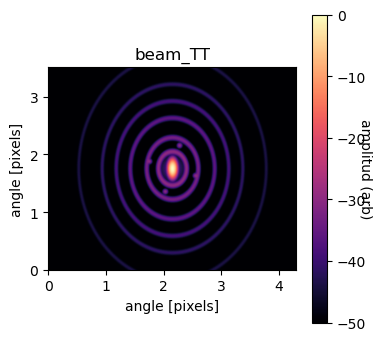

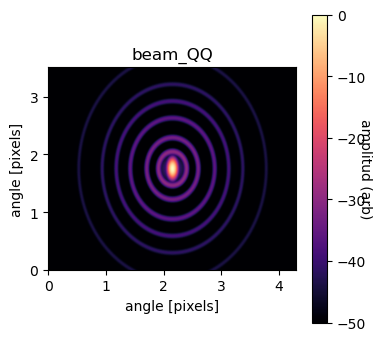

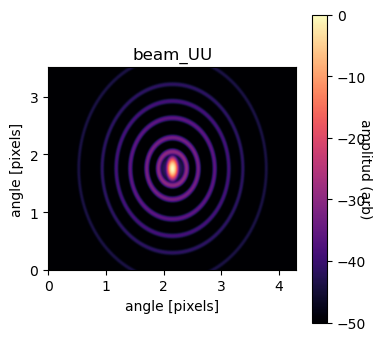

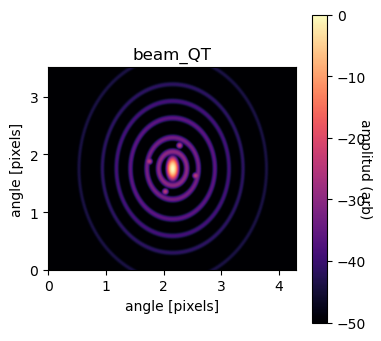

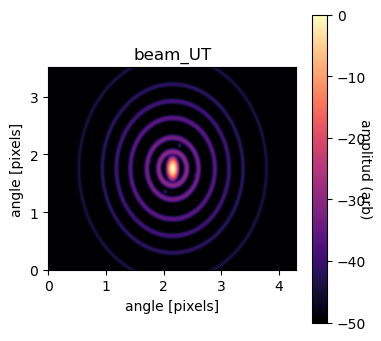

In [189]:
# beam sys

### beam systematics dictionary
bs = {"budy":{"A":1e-3,"FWHP":5.5,"R":50.,"psi":0.3,"polfracQ":0.5,"polfracU":0.01},  
                                                                         # little budy amplitude, 
                                                                         #FWHP, offset spacing, rotationa angle (radians)
                                                                        # pol_fraction for Q and U
     "ghostshelf": {"A":1e-4,"Diam":20.,"roll_off":7.},    #model of ghosting, amplitude (A), diameter (Diam) 
     "hex_crostalk":{"grid_space": 2.5,"N":5,"neighbor_exp_fall":0.01}, 
                                                                               ## model of optical cross talk 
                                                                               ## to detectors on a hex grid
                                                                               ## assumed to be exponetial
                                                                               ## assumed to be 50% polarized
      "TtoQ":{"mono":1e-3,"dip_x":1e-2,"dip_y":1e-2,"quad_x":1e-2,"quad_45":1e-2},
      "TtoU":{"mono":1e-3,"dip_x":1e-2,"dip_y":1e-2,"quad_x":1e-2,"quad_45":1e-2},
                                                                  ## multiplole expansion leakage
      'psi':0.01*np.pi/180.
                                  ## detetor angle rotations
                   }


beam_sys = BeamSystematics()
beam_TT, beam_QQ, beam_UU, beam_QT, beam_UT, beam_QU, beam_UQ = make_systematics_beams_r(Nx, Ny, pix_size, FWHM_x, beam_x, bs)


######################################################################################################################################
beam_to_plot = beam_TT
beam_to_plot = beam_to_plot / np.max(beam_to_plot) + 1e-5
beam_to_plot = 10. * np.log10(beam_to_plot)
Plot_beam_rectangular(beam_to_plot,np.min(beam_to_plot),np.max(beam_to_plot),X_width/2, Y_width/2,  "beam_TT", 'angle [pixels]')

beam_to_plot = beam_QQ
beam_to_plot = beam_to_plot / np.max(beam_to_plot) + 1e-5
beam_to_plot = 10. * np.log10(beam_to_plot)
Plot_beam_rectangular(beam_to_plot,np.min(beam_to_plot),np.max(beam_to_plot),X_width/2, Y_width/2, "beam_QQ", 'angle [pixels]')
                                                            
beam_to_plot = beam_UU
beam_to_plot = beam_to_plot / np.max(beam_to_plot) + 1e-5
beam_to_plot = 10. * np.log10(beam_to_plot)
Plot_beam_rectangular(beam_to_plot,np.min(beam_to_plot),np.max(beam_to_plot),X_width/2, Y_width/2,"beam_UU", 'angle [pixels]')


beam_to_plot = beam_QT
if np.any(beam_to_plot <= 0):
    beam_to_plot[beam_to_plot <= 0] = 1e-21
beam_to_plot = beam_to_plot / np.max(beam_to_plot) + 1e-5
beam_to_plot = 10. * np.log10(beam_to_plot)
Plot_beam_rectangular(beam_to_plot,np.min(beam_to_plot),np.max(beam_to_plot),X_width/2, Y_width/2, "beam_QT", 'angle [pixels]')

beam_to_plot = beam_UT
beam_to_plot = beam_to_plot / np.max(beam_to_plot) + 1e-5
if np.any(beam_to_plot <= 0):
    beam_to_plot[beam_to_plot <= 0] = 1e-21
beam_to_plot = 10. * np.log10(beam_to_plot)
Plot_beam_rectangular(beam_to_plot,np.min(beam_to_plot),np.max(beam_to_plot),X_width/2, Y_width/2, "beam_UT", 'angle [pixels]')

In [262]:
# convolution with perfect beam
perf_beam, no1, no2, no3, no4, no5 = create_beam_secpeaks(pix_size, FWHM_x, FWHM_y, 0, array_dB, r, r1, X, Y, a, ellipticity)
perf_beam = perf_beam / np.sum(perf_beam)

I_conv_perf = convolve_map_with_beam(cmb_I_2d, perf_beam)
Q_conv_perf = convolve_map_with_beam(cmb_Q_2d, perf_beam)
U_conv_perf = convolve_map_with_beam(cmb_U_2d, perf_beam)


# convolution with real beam
I_conv_real = convolve_map_with_beam(cmb_I_2d, beam_TT)
Q_conv_real = convolve_map_with_beam(cmb_Q_2d, beam_QQ)
U_conv_real = convolve_map_with_beam(cmb_U_2d, beam_UU)

### Pol angle

In [268]:
std_deviation_degree = [1., 2., 3., 4.]
std_deviation_rad = np.ones_like((std_deviation_degree))

for i in range(len(std_deviation_degree)):
    std_deviation_rad[i]    = std_deviation_degree[i] * np.pi / 180
    
gauss_center  = 0

print(std_deviation_rad)

[0.017 0.035 0.052 0.07 ]


In [269]:
Q_polangle_1, U_polangle_1   = polangle_map(Q_conv_real, U_conv_real, gauss_center, std_deviation_rad[0])
Q_polangle_2, U_polangle_2   = polangle_map(Q_conv_real, U_conv_real, gauss_center, std_deviation_rad[1])
Q_polangle_3, U_polangle_3   = polangle_map(Q_conv_real, U_conv_real, gauss_center, std_deviation_rad[2])
Q_polangle_4, U_polangle_4   = polangle_map(Q_conv_real, U_conv_real, gauss_center, std_deviation_rad[3])

### Apodizzazione

In [272]:
window = (cosine_window_r(Nx, Ny, pix_size))


Q_ap_1 = window * Q_polangle_1
U_ap_1 = window * U_polangle_1
Q_ap_2 = window * Q_polangle_2
U_ap_2 = window * U_polangle_2
Q_ap_3 = window * Q_polangle_3
U_ap_3 = window * U_polangle_3
Q_ap_4 = window * Q_polangle_4
U_ap_4 = window * U_polangle_4


I_ap = window * I_conv_real

### Deconvoluzione

In [288]:
I_deconv = correct_lr_r(I_ap/window, perf_beam,Nx, Ny, pix_size, 'onestep', None, 1e-10, 1e-12, None, 50)

Q_deconv_1 = correct_lr_r(Q_ap_1/window, perf_beam,Nx, Ny, pix_size, 'onestep', None, 1e-10, 1e-12, None, 50)
U_deconv_1 = correct_lr_r(U_ap_1/window, perf_beam,Nx, Ny, pix_size, 'onestep', None, 1e-10, 1e-12, None, 50)

Q_deconv_2 = correct_lr_r(Q_ap_2/window, perf_beam,Nx, Ny, pix_size, 'onestep', None, 1e-10, 1e-12, None, 50)
U_deconv_2 = correct_lr_r(U_ap_2/window, perf_beam,Nx, Ny, pix_size, 'onestep', None, 1e-10, 1e-12, None, 50)

Q_deconv_3 = correct_lr_r(Q_ap_3/window, perf_beam,Nx, Ny, pix_size, 'onestep', None, 1e-10, 1e-12, None, 50)
U_deconv_3 = correct_lr_r(U_ap_3/window, perf_beam,Nx, Ny, pix_size, 'onestep', None, 1e-10, 1e-12, None, 50)

Q_deconv_4 = correct_lr_r(Q_ap_4/window, perf_beam,Nx, Ny, pix_size, 'onestep', None, 1e-10, 1e-12, None, 50)
U_deconv_4 = correct_lr_r(U_ap_4/window, perf_beam,Nx, Ny, pix_size, 'onestep', None, 1e-10, 1e-12, None, 50)

In [195]:
np.shape(U_deconv_4)

(490, 600)

### Differenza - side lobes

In [291]:
I_diff = (I_conv_perf- I_deconv)

Q_diff_1 = (Q_conv_perf- Q_deconv_1)
U_diff_1 = (U_conv_perf- U_deconv_1)

Q_diff_2 = (Q_conv_perf- Q_deconv_2)
U_diff_2 = (U_conv_perf- U_deconv_2)

Q_diff_3 = (Q_conv_perf- Q_deconv_3)
U_diff_3 = (U_conv_perf- U_deconv_3)

Q_diff_4 = (Q_conv_perf- Q_deconv_4)
U_diff_4 = (U_conv_perf- U_deconv_4)

# Grafici di confronto - mappe
Confronto 
- mappa originale (cmb_Q_2d), convoluta con beam(Q_conv_real), angolo di polarizzazione (1 a caso)(Q_polangle_1), apodizzata(Q_ap_1), deconvoluta(Q_deconv_1) e differenza(Q_diff_1) 
- convoluta con beam(Q_conv_real), angolo di polarizzazione (tutte)(Q_polangle_1), deconvoluta(Q_deconv_1) e differenza(Q_diff_1) 


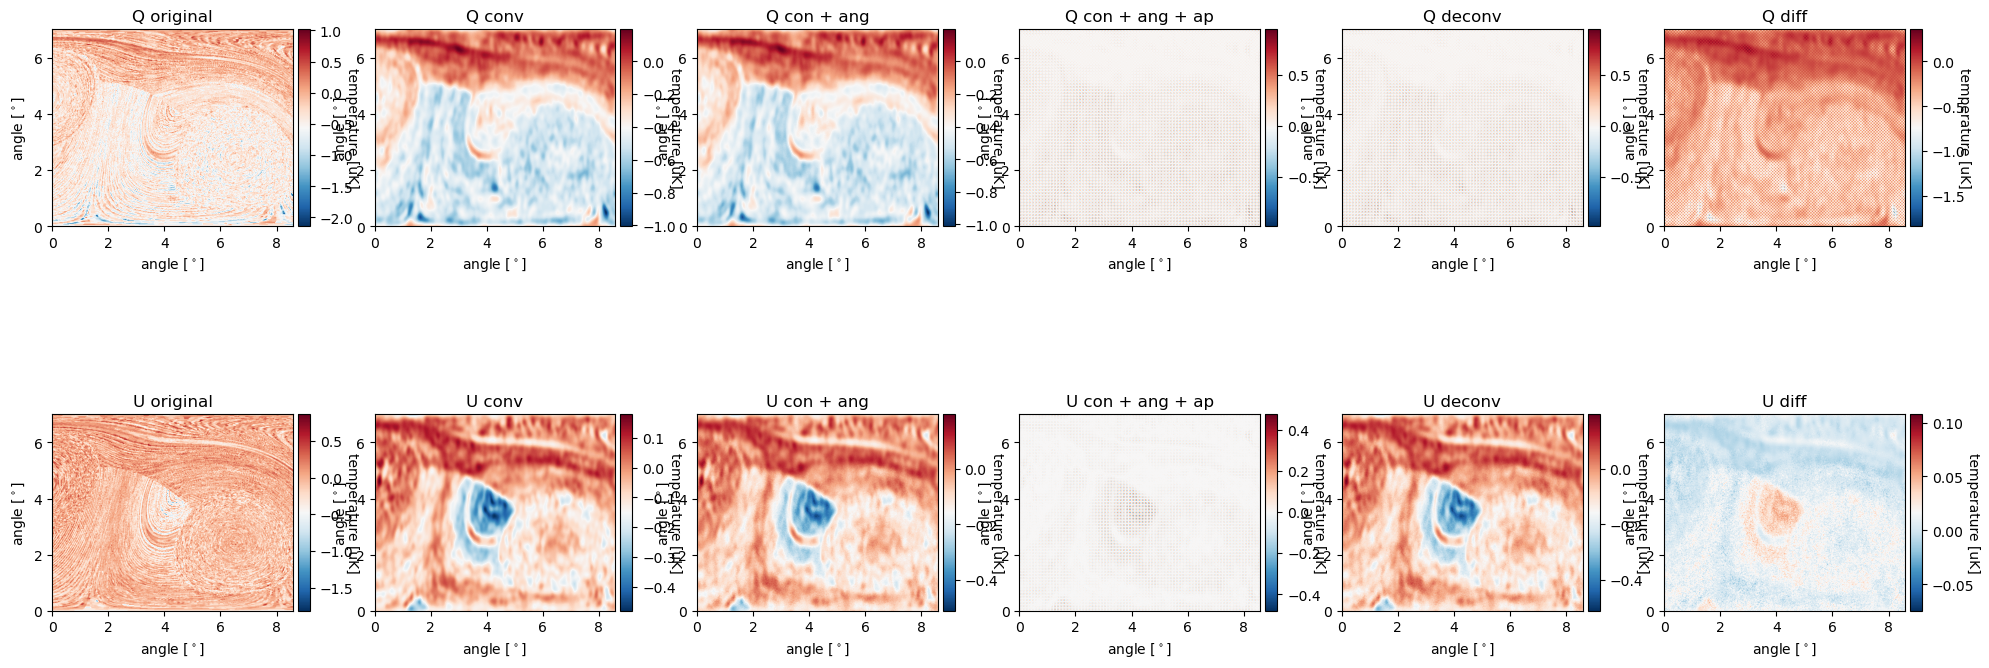

In [292]:
Map_to_Plot = [cmb_Q_2d ,Q_conv_real, Q_polangle_1, Q_ap_1 ,Q_deconv_1, Q_diff_1, cmb_U_2d ,U_conv_real, U_polangle_1, U_ap_1 ,U_deconv_1, U_diff_1]
title = ["Q original", "Q conv", "Q con + ang", "Q con + ang + ap", "Q deconv", "Q diff", "U original", "U conv", "U con + ang", "U con + ang + ap", "U deconv", "U diff"]

c_factor_max = np.zeros(len(Map_to_Plot))
c_factor_min = np.zeros(len(Map_to_Plot))

for i in range (len(Map_to_Plot)):
    c_factor_max[i] = np.max(Map_to_Plot[i])
    c_factor_min[i] = np.min(Map_to_Plot[i])


fig, axs = plt.subplots(2, 6, figsize=(20, 8))
axs      = axs.flatten()
for i, (map_data, c_factor_iter_min, c_factor_iter_max) in enumerate(zip(Map_to_Plot, c_factor_min, c_factor_max)):
        Plot_CMB_Map_compact(axs[i], map_data, c_factor_iter_min, c_factor_iter_max, X_width, Y_width)
        axs[i].set_title(title[i])

plt.tight_layout()
plt.subplots_adjust(wspace=0.25, hspace=0.2, top=0.90)
#plt.suptitle('Maps convolved with beam and with polarization angle systematics added', fontsize=20)
plt.show()

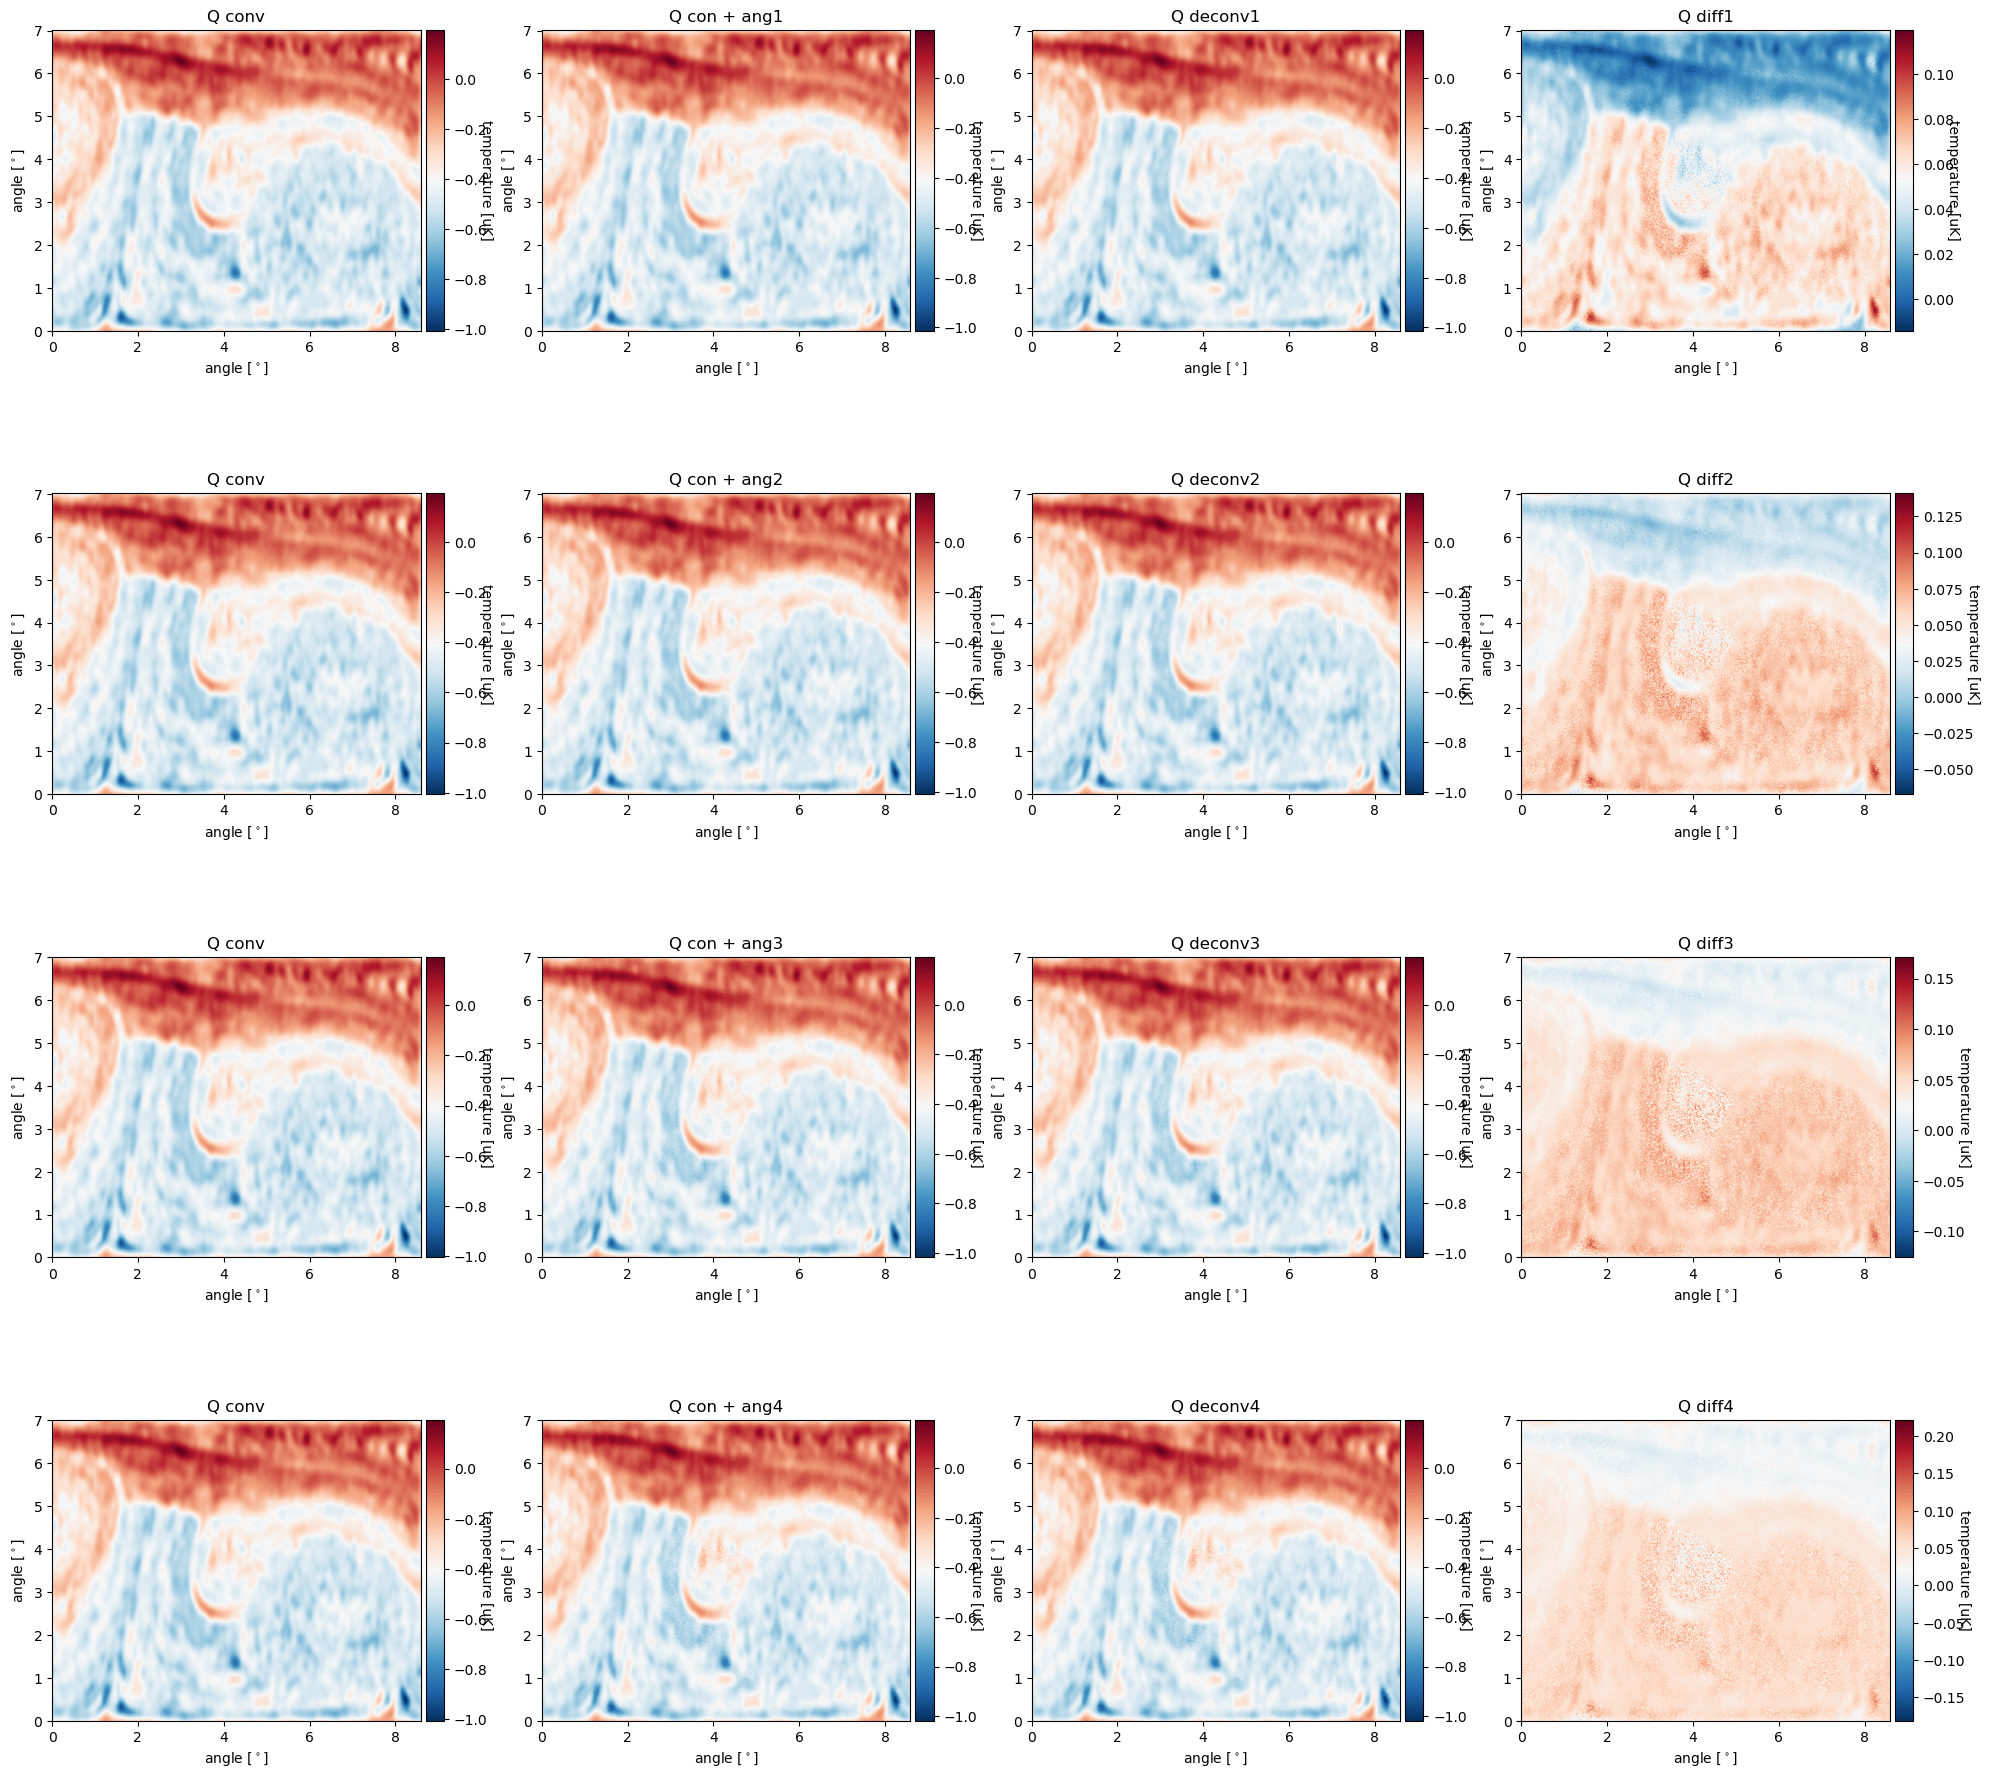

In [198]:
Map_to_Plot = [Q_conv_real, Q_polangle_1 ,Q_deconv_1, Q_diff_1,
               Q_conv_real, Q_polangle_2 ,Q_deconv_2, Q_diff_2,
               Q_conv_real, Q_polangle_3 ,Q_deconv_3, Q_diff_3,
               Q_conv_real, Q_polangle_4 ,Q_deconv_4, Q_diff_4]
title = ["Q conv", "Q con + ang1",  "Q deconv1", "Q diff1",
        "Q conv", "Q con + ang2",  "Q deconv2", "Q diff2",
        "Q conv", "Q con + ang3",  "Q deconv3", "Q diff3",
        "Q conv", "Q con + ang4", "Q deconv4", "Q diff4"]

c_factor_max = np.zeros(len(Map_to_Plot))
c_factor_min = np.zeros(len(Map_to_Plot))

for i in range (len(Map_to_Plot)):
    c_factor_max[i] = np.max(Map_to_Plot[i])
    c_factor_min[i] = np.min(Map_to_Plot[i])


fig, axs = plt.subplots(4, 4, figsize=(20, 20))
axs      = axs.flatten()
for i, (map_data, c_factor_iter_min, c_factor_iter_max) in enumerate(zip(Map_to_Plot, c_factor_min, c_factor_max)):
        Plot_CMB_Map_compact(axs[i], map_data, c_factor_iter_min, c_factor_iter_max, X_width, Y_width)
        axs[i].set_title(title[i])

plt.tight_layout()
plt.subplots_adjust(wspace=0.25, hspace=0.2, top=0.90)
#plt.suptitle('Maps convolved with beam and with polarization angle systematics added', fontsize=20)
plt.show()

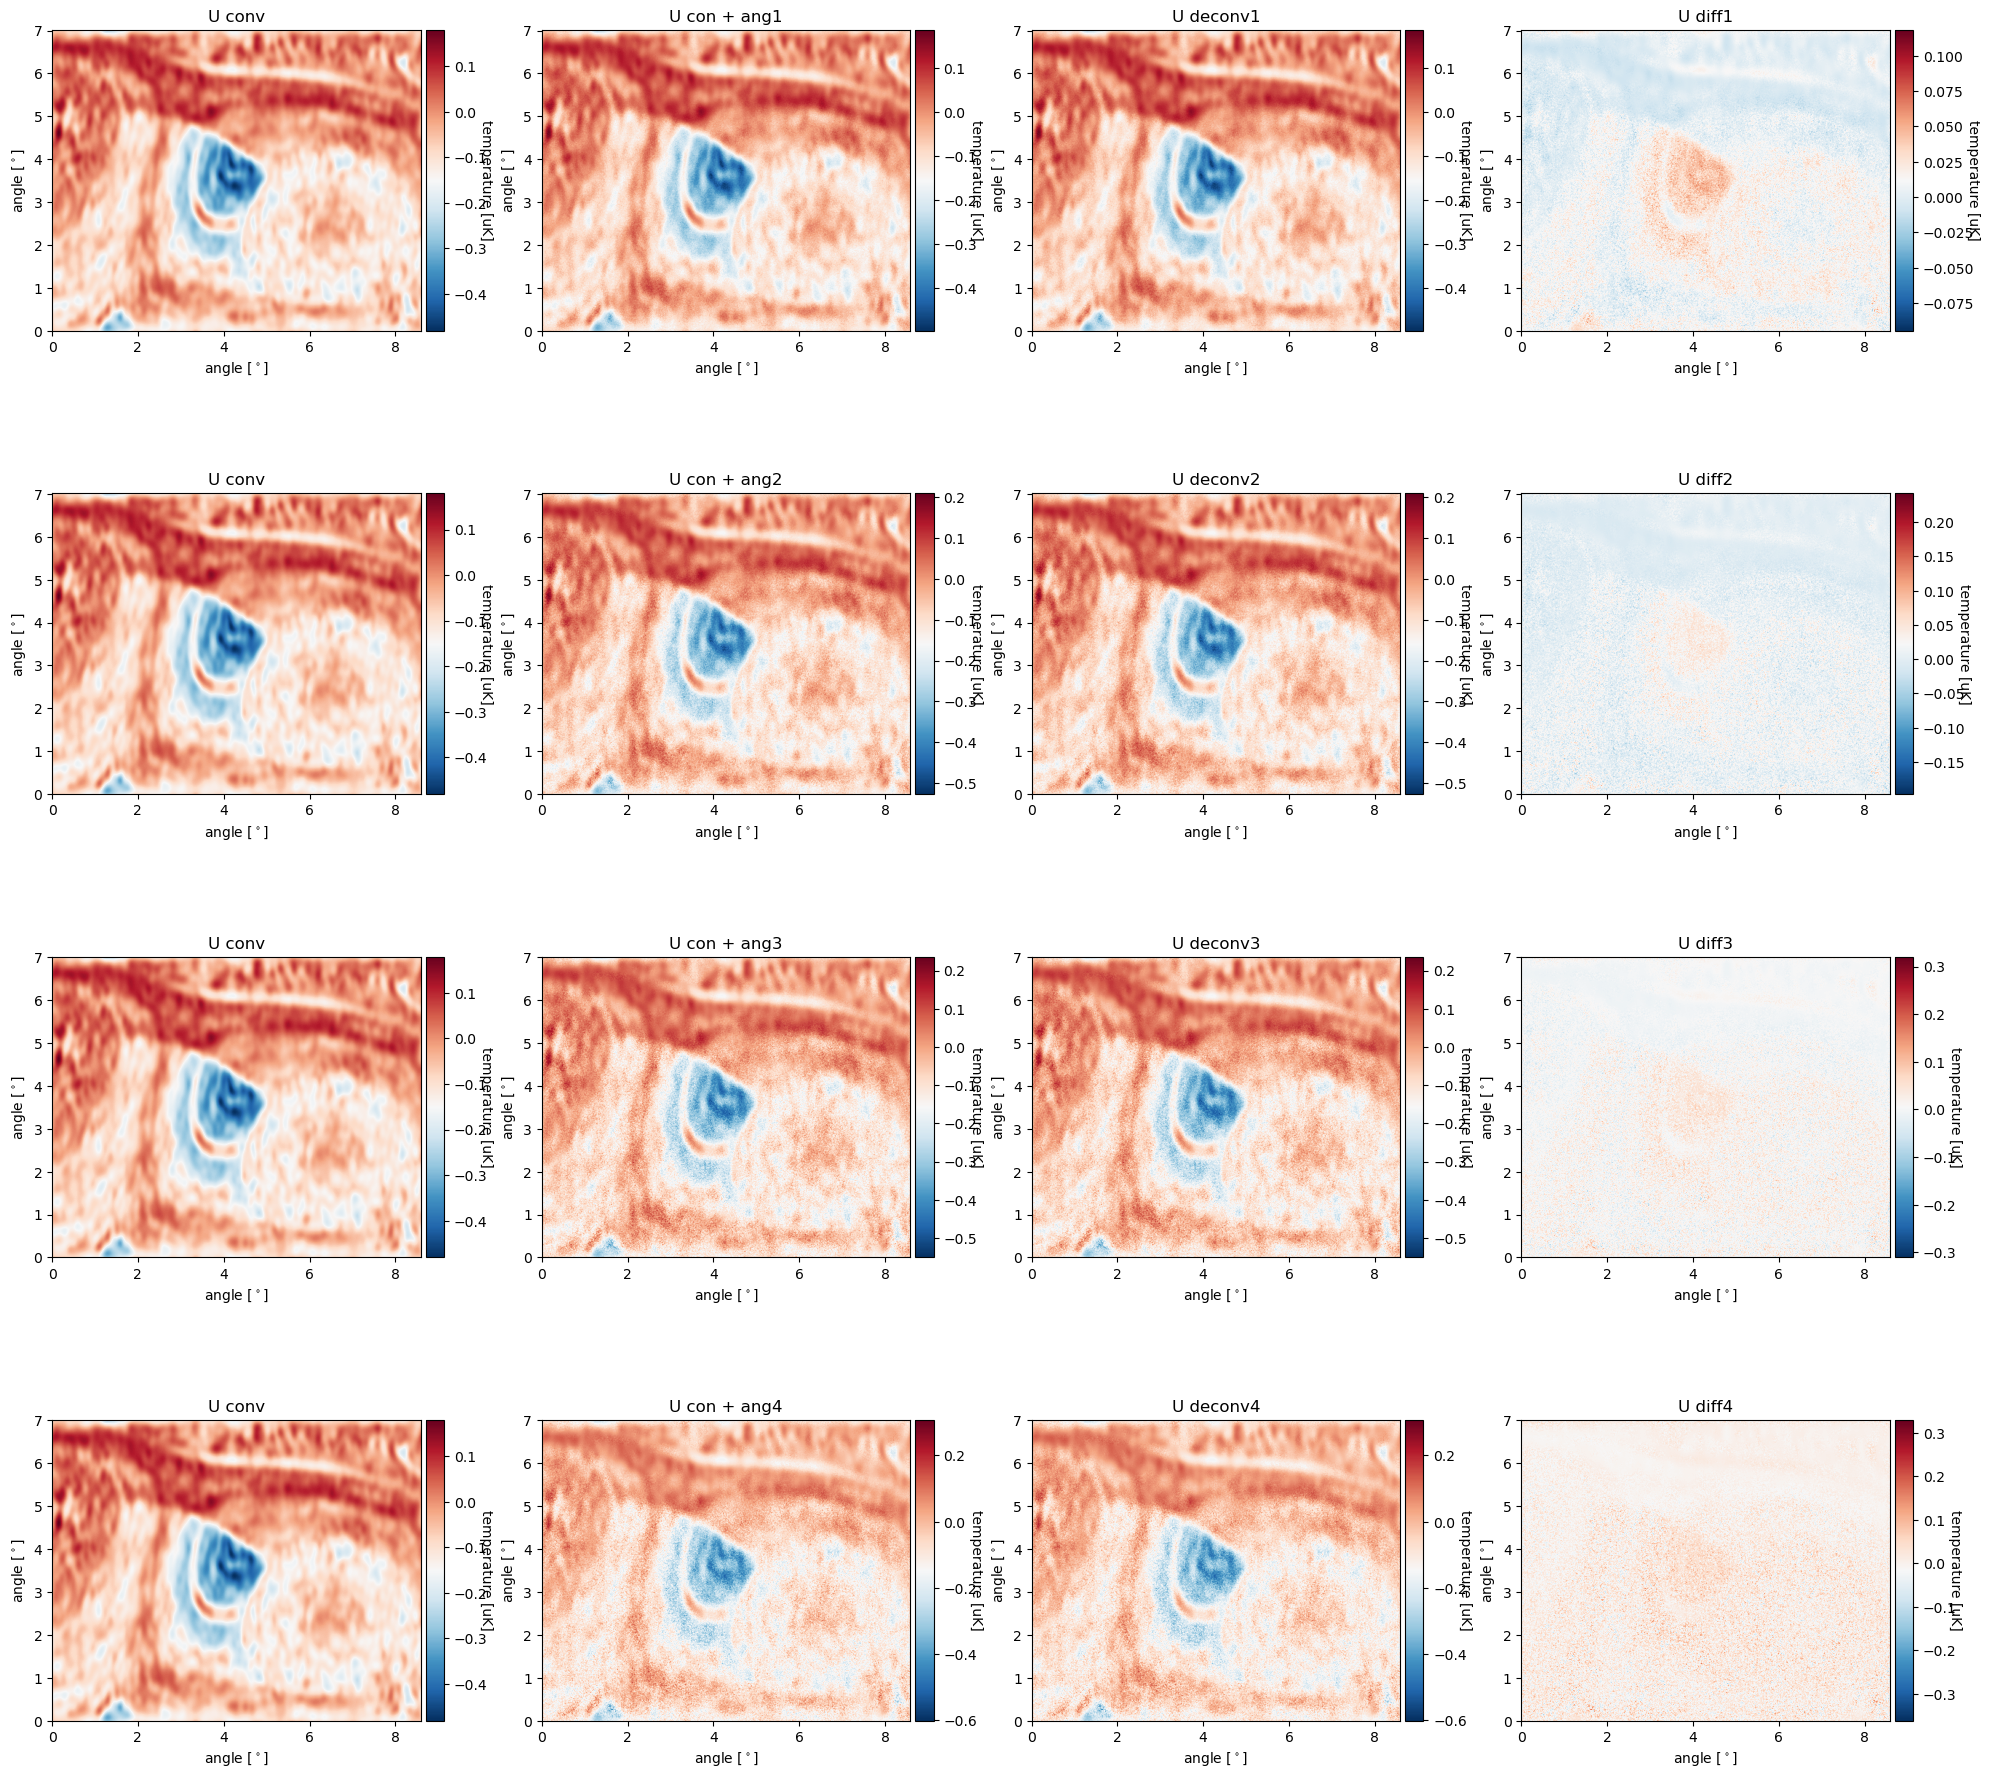

In [199]:
Map_to_Plot = [U_conv_real, U_polangle_1 ,U_deconv_1, U_diff_1,
               U_conv_real, U_polangle_2 ,U_deconv_2, U_diff_2,
               U_conv_real, U_polangle_3 ,U_deconv_3, U_diff_3,
               U_conv_real, U_polangle_4 ,U_deconv_4, U_diff_4]
title = ["U conv", "U con + ang1",  "U deconv1", "U diff1",
        "U conv", "U con + ang2",  "U deconv2", "U diff2",
        "U conv", "U con + ang3",  "U deconv3", "U diff3",
        "U conv", "U con + ang4", "U deconv4", "U diff4"]

c_factor_max = np.zeros(len(Map_to_Plot))
c_factor_min = np.zeros(len(Map_to_Plot))

for i in range (len(Map_to_Plot)):
    c_factor_max[i] = np.max(Map_to_Plot[i])
    c_factor_min[i] = np.min(Map_to_Plot[i])


fig, axs = plt.subplots(4, 4, figsize=(20, 20))
axs      = axs.flatten()
for i, (map_data, c_factor_iter_min, c_factor_iter_max) in enumerate(zip(Map_to_Plot, c_factor_min, c_factor_max)):
        Plot_CMB_Map_compact(axs[i], map_data, c_factor_iter_min, c_factor_iter_max, X_width, Y_width)
        axs[i].set_title(title[i])

plt.tight_layout()
plt.subplots_adjust(wspace=0.25, hspace=0.2, top=0.90)
#plt.suptitle('Maps convolved with beam and with polarization angle systematics added', fontsize=20)
plt.show()

# Power spectra
Estraggo i PS per
- mappa originale (cmb_Q_2d)
- angolo di polarizzazione(Q_polangle_n),
    - 1
    - 2
    - 3
    - 4
    - 5
- deconvoluta(Q_deconv_1)
    - 1
    - 2
    - 3
    - 4
    - 5
- differenza(Q_diff_1) 
    - 1
    - 2
    - 3
    - 4
    - 5

In [200]:
import pymaster as nmt

pix_size_rad = np.radians(pix_size /60)

X_width_rad = Nx * pix_size_rad
Y_width_rad = Ny * pix_size_rad


# Masks:
# Let's now create a mask:
mask = np.ones_like(cmb_Q_2d)

# Bins:
l0_bins = np.arange(Nx/8) * 8 * np.pi/X_width_rad
lf_bins = (np.arange(Nx/8)+1) * 8 * np.pi/X_width_rad
b = nmt.NmtBinFlat(l0_bins, lf_bins)

# The effective sampling rate for these bandpowers can be obtained calling:
ells_uncoupled = b.get_effective_ells()

In [281]:
Q_polangle_1

array([[-0.424, -0.406, -0.396, ..., -0.468, -0.456, -0.44 ],
       [-0.451, -0.437, -0.423, ..., -0.494, -0.473, -0.467],
       [-0.474, -0.461, -0.448, ..., -0.519, -0.506, -0.49 ],
       ...,
       [-0.343, -0.328, -0.323, ..., -0.382, -0.37 , -0.357],
       [-0.373, -0.36 , -0.343, ..., -0.409, -0.398, -0.386],
       [-0.402, -0.385, -0.373, ..., -0.436, -0.425, -0.411]])

In [284]:
Q_deconv_1

array([[-0.424, -0.406, -0.396, ..., -0.468, -0.456, -0.44 ],
       [-0.451, -0.437, -0.423, ..., -0.494, -0.473, -0.467],
       [-0.474, -0.461, -0.448, ..., -0.519, -0.506, -0.49 ],
       ...,
       [-0.343, -0.328, -0.323, ..., -0.382, -0.37 , -0.357],
       [-0.373, -0.36 , -0.343, ..., -0.409, -0.398, -0.386],
       [-0.402, -0.385, -0.373, ..., -0.436, -0.425, -0.411]])

In [201]:

# Fields: per ogni mappa

# mappe originali
f0_original = nmt.NmtFieldFlat(X_width_rad, Y_width_rad, mask, [cmb_I_2d])
f2_original = nmt.NmtFieldFlat(X_width_rad, Y_width_rad, mask, [cmb_Q_2d, cmb_U_2d], purify_b=True)


# mappe angolo di pol
#f0_pol = nmt.NmtFieldFlat(X_width_rad, Y_width_rad, mask, [cmb_I_2d])
f2_pol1 = nmt.NmtFieldFlat(X_width_rad, Y_width_rad, mask, [Q_polangle_1, U_polangle_1], purify_b=True)
f2_pol2 = nmt.NmtFieldFlat(X_width_rad, Y_width_rad, mask, [Q_polangle_2, U_polangle_2], purify_b=True)
f2_pol3 = nmt.NmtFieldFlat(X_width_rad, Y_width_rad, mask, [Q_polangle_3, U_polangle_3], purify_b=True)
f2_pol4 = nmt.NmtFieldFlat(X_width_rad, Y_width_rad, mask, [Q_polangle_4, U_polangle_4], purify_b=True)

# mappe deconvolute Q_deconv_1
f0_deconv = nmt.NmtFieldFlat(X_width_rad, Y_width_rad, mask, [I_deconv])
f2_deconv1 = nmt.NmtFieldFlat(X_width_rad, Y_width_rad, mask, [Q_deconv_1, U_deconv_1], purify_b=True)
f2_deconv2 = nmt.NmtFieldFlat(X_width_rad, Y_width_rad, mask, [Q_deconv_2, U_deconv_2], purify_b=True)
f2_deconv3 = nmt.NmtFieldFlat(X_width_rad, Y_width_rad, mask, [Q_deconv_3, U_deconv_3], purify_b=True)
f2_deconv4 = nmt.NmtFieldFlat(X_width_rad, Y_width_rad, mask, [Q_deconv_4, U_deconv_4], purify_b=True)


# mappe differenza
f0_diff = nmt.NmtFieldFlat(X_width_rad, Y_width_rad, mask, [I_diff])
f2_diff1 = nmt.NmtFieldFlat(X_width_rad, Y_width_rad, mask, [Q_diff_1, U_diff_1], purify_b=True)
f2_diff2 = nmt.NmtFieldFlat(X_width_rad, Y_width_rad, mask, [Q_diff_2, U_diff_2], purify_b=True)
f2_diff3 = nmt.NmtFieldFlat(X_width_rad, Y_width_rad, mask, [Q_diff_3, U_diff_3], purify_b=True)
f2_diff4 = nmt.NmtFieldFlat(X_width_rad, Y_width_rad, mask, [Q_diff_4, U_diff_4], purify_b=True)

In [244]:
# workspace (per ognuno!!)
'''
w00_diff4 = nmt.NmtWorkspaceFlat()
w02_diff4 = nmt.NmtWorkspaceFlat()
w22_diff4 = nmt.NmtWorkspaceFlat()

w00_diff4.compute_coupling_matrix(f0_diff, f0_diff, b)
w02_diff4.compute_coupling_matrix(f0_diff, f2_diff4, b)
w22_diff4.compute_coupling_matrix(f2_diff4, f2_diff4, b)

w00_diff4.write_to("w00_flat_diff4.fits")
w02_diff4.write_to("w02_flat_diff4.fits")
w22_diff4.write_to("w22_flat_diff4.fits")
'''

'\nw00_diff4 = nmt.NmtWorkspaceFlat()\nw02_diff4 = nmt.NmtWorkspaceFlat()\nw22_diff4 = nmt.NmtWorkspaceFlat()\n\nw00_diff4.compute_coupling_matrix(f0_diff, f0_diff, b)\nw02_diff4.compute_coupling_matrix(f0_diff, f2_diff4, b)\nw22_diff4.compute_coupling_matrix(f2_diff4, f2_diff4, b)\n\nw00_diff4.write_to("w00_flat_diff4.fits")\nw02_diff4.write_to("w02_flat_diff4.fits")\nw22_diff4.write_to("w22_flat_diff4.fits")\n'

In [245]:
w00 = nmt.NmtWorkspaceFlat()
w02 = nmt.NmtWorkspaceFlat()
w22 = nmt.NmtWorkspaceFlat()

w00pol1 = nmt.NmtWorkspaceFlat()
w02pol1 = nmt.NmtWorkspaceFlat()
w22pol1 = nmt.NmtWorkspaceFlat()
w00pol2 = nmt.NmtWorkspaceFlat()
w02pol2 = nmt.NmtWorkspaceFlat()
w22pol2 = nmt.NmtWorkspaceFlat()
w00pol3 = nmt.NmtWorkspaceFlat()
w02pol3 = nmt.NmtWorkspaceFlat()
w22pol3 = nmt.NmtWorkspaceFlat()
w00pol4 = nmt.NmtWorkspaceFlat()
w02pol4 = nmt.NmtWorkspaceFlat()
w22pol4 = nmt.NmtWorkspaceFlat()

w00deconv1 = nmt.NmtWorkspaceFlat()
w02deconv1 = nmt.NmtWorkspaceFlat()
w22deconv1 = nmt.NmtWorkspaceFlat()
w00deconv2 = nmt.NmtWorkspaceFlat()
w02deconv2 = nmt.NmtWorkspaceFlat()
w22deconv2 = nmt.NmtWorkspaceFlat()
w00deconv3 = nmt.NmtWorkspaceFlat()
w02deconv3 = nmt.NmtWorkspaceFlat()
w22deconv3 = nmt.NmtWorkspaceFlat()
w00deconv4 = nmt.NmtWorkspaceFlat()
w02deconv4 = nmt.NmtWorkspaceFlat()
w22deconv4 = nmt.NmtWorkspaceFlat()


w00diff1 = nmt.NmtWorkspaceFlat()
w02diff1 = nmt.NmtWorkspaceFlat()
w22diff1 = nmt.NmtWorkspaceFlat()
w00diff2 = nmt.NmtWorkspaceFlat()
w02diff2 = nmt.NmtWorkspaceFlat()
w22diff2 = nmt.NmtWorkspaceFlat()
w00diff3 = nmt.NmtWorkspaceFlat()
w02diff3 = nmt.NmtWorkspaceFlat()
w22diff3 = nmt.NmtWorkspaceFlat()
w00diff4 = nmt.NmtWorkspaceFlat()
w02diff4 = nmt.NmtWorkspaceFlat()
w22diff4 = nmt.NmtWorkspaceFlat()


In [246]:
# workspace
w00.read_from("workspace/w00_flat.fits")
w02.read_from("workspace/w02_flat.fits")
w22.read_from("workspace/w22_flat.fits")

w00pol1.read_from("workspace/w00_flat_pol1.fits")
w02pol1.read_from("workspace/w02_flat_pol1.fits")
w22pol1.read_from("workspace/w22_flat_pol1.fits")

w00pol2.read_from("workspace/w00_flat_pol2.fits")
w02pol2.read_from("workspace/w02_flat_pol2.fits")
w22pol2.read_from("workspace/w22_flat_pol2.fits")

w00pol3.read_from("workspace/w00_flat_pol3.fits")
w02pol3.read_from("workspace/w02_flat_pol3.fits")
w22pol3.read_from("workspace/w22_flat_pol3.fits")

w00pol4.read_from("workspace/w00_flat_pol4.fits")
w02pol4.read_from("workspace/w02_flat_pol4.fits")
w22pol4.read_from("workspace/w22_flat_pol4.fits")

w00deconv1.read_from("workspace/w00_flat_deconv1.fits")
w02deconv1.read_from("workspace/w02_flat_deconv1.fits")
w22deconv1.read_from("workspace/w22_flat_deconv1.fits")

w00deconv2.read_from("workspace/w00_flat_deconv2.fits")
w02deconv2.read_from("workspace/w02_flat_deconv2.fits")
w22deconv2.read_from("workspace/w22_flat_deconv2.fits")

w00deconv3.read_from("workspace/w00_flat_deconv3.fits")
w02deconv3.read_from("workspace/w02_flat_deconv3.fits")
w22deconv3.read_from("workspace/w22_flat_deconv3.fits")

w00deconv4.read_from("workspace/w00_flat_deconv4.fits")
w02deconv4.read_from("workspace/w02_flat_deconv4.fits")
w22deconv4.read_from("workspace/w22_flat_deconv4.fits")

w00diff1.read_from("workspace/w00_flat_diff1.fits")
w02diff1.read_from("workspace/w02_flat_diff1.fits")
w22diff1.read_from("workspace/w22_flat_diff1.fits")

w00diff2.read_from("workspace/w00_flat_diff2.fits")
w02diff2.read_from("workspace/w02_flat_diff2.fits")
w22diff2.read_from("workspace/w22_flat_diff2.fits")

w00diff3.read_from("workspace/w00_flat_diff3.fits")
w02diff3.read_from("workspace/w02_flat_diff3.fits")
w22diff3.read_from("workspace/w22_flat_diff3.fits")

w00diff4.read_from("workspace/w00_flat_diff4.fits")
w02diff4.read_from("workspace/w02_flat_diff4.fits")
w22diff4.read_from("workspace/w22_flat_diff4.fits")

In [302]:
cl02_uncoupled_pol1

array([[-2.036e-04,  1.037e-07,  4.096e-08,  6.820e-09,  3.278e-10,
        -3.386e-09,  3.547e-09,  2.740e-09,  8.631e-10,  3.294e-09,
         2.443e-09,  4.210e-09,  5.052e-09,  5.558e-09,  1.595e-09,
         2.778e-09,  4.515e-09,  2.260e-09,  1.752e-09,  1.915e-09,
         1.788e-09,  1.502e-09,  2.121e-09,  2.230e-09,  1.661e-09,
         5.944e-10,  3.521e-11,  9.056e-10,  1.312e-09,  1.446e-09,
         6.916e-10,  6.747e-10,  2.196e-10, -8.763e-11,  1.078e-09,
         9.658e-10,  7.849e-10,  7.588e-10,  5.680e-10,  3.747e-10,
         7.752e-10,  8.853e-10,  8.468e-10,  6.947e-10,  6.734e-10,
         9.235e-10,  8.641e-10,  7.349e-10,  7.004e-10,  5.690e-10,
         7.623e-10,  5.528e-10,  5.168e-10,  5.874e-10,  5.012e-10,
         4.408e-10,  4.632e-10,  5.649e-10,  4.092e-10,  3.125e-10,
         4.281e-10,  3.640e-10,  4.678e-10,  5.222e-10,  5.851e-10,
         4.774e-10,  4.861e-10,  1.492e-10,  2.174e-10,  3.775e-10,
         2.220e-10,  4.238e-10,  2.367e-10,  2.3

In [301]:
cl02_uncoupled_pol2


array([[-2.036e-04,  1.037e-07,  4.096e-08,  6.820e-09,  3.278e-10,
        -3.386e-09,  3.547e-09,  2.740e-09,  8.631e-10,  3.294e-09,
         2.443e-09,  4.210e-09,  5.052e-09,  5.558e-09,  1.595e-09,
         2.778e-09,  4.515e-09,  2.260e-09,  1.752e-09,  1.915e-09,
         1.788e-09,  1.502e-09,  2.121e-09,  2.230e-09,  1.661e-09,
         5.944e-10,  3.521e-11,  9.056e-10,  1.312e-09,  1.446e-09,
         6.916e-10,  6.747e-10,  2.196e-10, -8.763e-11,  1.078e-09,
         9.658e-10,  7.849e-10,  7.588e-10,  5.680e-10,  3.747e-10,
         7.752e-10,  8.853e-10,  8.468e-10,  6.947e-10,  6.734e-10,
         9.235e-10,  8.641e-10,  7.349e-10,  7.004e-10,  5.690e-10,
         7.623e-10,  5.528e-10,  5.168e-10,  5.874e-10,  5.012e-10,
         4.408e-10,  4.632e-10,  5.649e-10,  4.092e-10,  3.125e-10,
         4.281e-10,  3.640e-10,  4.678e-10,  5.222e-10,  5.851e-10,
         4.774e-10,  4.861e-10,  1.492e-10,  2.174e-10,  3.775e-10,
         2.220e-10,  4.238e-10,  2.367e-10,  2.3

In [303]:
# Computing power spectra:

# mappe originali
cl00_coupled   = nmt.compute_coupled_cell_flat(f0_original, f0_original, b)
cl00_uncoupled = w00.decouple_cell(cl00_coupled)
cl02_coupled   = nmt.compute_coupled_cell_flat(f0_original, f2_original, b)
cl02_uncoupled = w02.decouple_cell(cl02_coupled)
cl22_coupled   = nmt.compute_coupled_cell_flat(f2_original, f2_original, b)
cl22_uncoupled = w22.decouple_cell(cl22_coupled)


# mappe angolo di pol
cl00_coupled_pol1   = nmt.compute_coupled_cell_flat(f0_original, f0_original, b)
cl00_uncoupled_pol1 = w00pol1.decouple_cell(cl00_coupled_pol1)
cl02_coupled_pol1   = nmt.compute_coupled_cell_flat(f0_original, f2_pol1, b)
cl02_uncoupled_pol1 = w02pol1.decouple_cell(cl02_coupled_pol1)
cl22_coupled_pol1   = nmt.compute_coupled_cell_flat(f2_pol1, f2_pol1, b)
cl22_uncoupled_pol1 = w22pol1.decouple_cell(cl22_coupled_pol1)

cl00_coupled_pol2   = nmt.compute_coupled_cell_flat(f0_original, f0_original, b)
cl00_uncoupled_pol2 = w00pol2.decouple_cell(cl00_coupled_pol2)
cl02_coupled_pol2   = nmt.compute_coupled_cell_flat(f0_original, f2_pol2, b)
cl02_uncoupled_pol2 = w02pol2.decouple_cell(cl02_coupled_pol2)
cl22_coupled_pol2   = nmt.compute_coupled_cell_flat(f2_pol2, f2_pol2, b)
cl22_uncoupled_pol2 = w22pol2.decouple_cell(cl22_coupled_pol2)

cl00_coupled_pol3   = nmt.compute_coupled_cell_flat(f0_original, f0_original, b)
cl00_uncoupled_pol3 = w00pol3.decouple_cell(cl00_coupled_pol3)
cl02_coupled_pol3   = nmt.compute_coupled_cell_flat(f0_original, f2_pol3, b)
cl02_uncoupled_pol3 = w02pol3.decouple_cell(cl02_coupled_pol3)
cl22_coupled_pol3   = nmt.compute_coupled_cell_flat(f2_pol3, f2_pol3, b)
cl22_uncoupled_pol3 = w22pol3.decouple_cell(cl22_coupled_pol3)

cl00_coupled_pol4   = nmt.compute_coupled_cell_flat(f0_original, f0_original, b)
cl00_uncoupled_pol4 = w00pol4.decouple_cell(cl00_coupled_pol4)
cl02_coupled_pol4   = nmt.compute_coupled_cell_flat(f0_original, f2_pol4, b)
cl02_uncoupled_pol4 = w02pol4.decouple_cell(cl02_coupled_pol4)
cl22_coupled_pol4   = nmt.compute_coupled_cell_flat(f2_pol4, f2_pol4, b)
cl22_uncoupled_pol4 = w22pol4.decouple_cell(cl22_coupled_pol4)



# mappe deconvolute Q_deconv_1
cl00_coupled_deconv1   = nmt.compute_coupled_cell_flat(f0_deconv, f0_deconv, b)
cl00_uncoupled_deconv1 = w00deconv1.decouple_cell(cl00_coupled_deconv1)
cl02_coupled_deconv1   = nmt.compute_coupled_cell_flat(f0_deconv, f2_deconv1, b)
cl02_uncoupled_deconv1 = w02deconv1.decouple_cell(cl02_coupled_deconv1)
cl22_coupled_deconv1   = nmt.compute_coupled_cell_flat(f2_deconv1, f2_deconv1, b)
cl22_uncoupled_deconv1 = w22deconv1.decouple_cell(cl22_coupled_deconv1)

cl00_coupled_deconv2   = nmt.compute_coupled_cell_flat(f0_deconv, f0_deconv, b)
cl00_uncoupled_deconv2 = w00deconv2.decouple_cell(cl00_coupled_deconv2)
cl02_coupled_deconv2   = nmt.compute_coupled_cell_flat(f0_deconv, f2_deconv2, b)
cl02_uncoupled_deconv2 = w02deconv2.decouple_cell(cl02_coupled_deconv2)
cl22_coupled_deconv2   = nmt.compute_coupled_cell_flat(f2_deconv2, f2_deconv2, b)
cl22_uncoupled_deconv2 = w22deconv2.decouple_cell(cl22_coupled_deconv2)

cl00_coupled_deconv3   = nmt.compute_coupled_cell_flat(f0_deconv, f0_deconv, b)
cl00_uncoupled_deconv3 = w00deconv3.decouple_cell(cl00_coupled_deconv3)
cl02_coupled_deconv3   = nmt.compute_coupled_cell_flat(f0_deconv, f2_deconv3, b)
cl02_uncoupled_deconv3 = w02deconv3.decouple_cell(cl02_coupled_deconv3)
cl22_coupled_deconv3   = nmt.compute_coupled_cell_flat(f2_deconv3, f2_deconv3, b)
cl22_uncoupled_deconv3 = w22deconv3.decouple_cell(cl22_coupled_deconv3)

cl00_coupled_deconv4   = nmt.compute_coupled_cell_flat(f0_deconv, f0_deconv, b)
cl00_uncoupled_deconv4 = w00deconv4.decouple_cell(cl00_coupled_deconv4)
cl02_coupled_deconv4   = nmt.compute_coupled_cell_flat(f0_deconv, f2_deconv4, b)
cl02_uncoupled_deconv4 = w02deconv4.decouple_cell(cl02_coupled_deconv4)
cl22_coupled_deconv4   = nmt.compute_coupled_cell_flat(f2_deconv4, f2_deconv4, b)
cl22_uncoupled_deconv4 = w22deconv4.decouple_cell(cl22_coupled_deconv4)



# mappe differenza
cl00_coupled_diff1   = nmt.compute_coupled_cell_flat(f0_diff, f0_diff, b)
cl00_uncoupled_diff1 = w00diff1.decouple_cell(cl00_coupled_diff1)
cl02_coupled_diff1   = nmt.compute_coupled_cell_flat(f0_diff, f2_diff1, b)
cl02_uncoupled_diff1 = w02diff1.decouple_cell(cl02_coupled_diff1)
cl22_coupled_diff1   = nmt.compute_coupled_cell_flat(f2_diff1, f2_diff1, b)
cl22_uncoupled_diff1 = w22diff1.decouple_cell(cl22_coupled_diff1)

cl00_coupled_diff2   = nmt.compute_coupled_cell_flat(f0_diff, f0_diff, b)
cl00_uncoupled_diff2 = w00diff2.decouple_cell(cl00_coupled_diff2)
cl02_coupled_diff2   = nmt.compute_coupled_cell_flat(f0_diff, f2_diff2, b)
cl02_uncoupled_diff2 = w02diff2.decouple_cell(cl02_coupled_diff2)
cl22_coupled_diff2   = nmt.compute_coupled_cell_flat(f2_diff2, f2_diff2, b)
cl22_uncoupled_diff2 = w22diff2.decouple_cell(cl22_coupled_diff2)

cl00_coupled_diff3   = nmt.compute_coupled_cell_flat(f0_diff, f0_diff, b)
cl00_uncoupled_diff3 = w00diff3.decouple_cell(cl00_coupled_diff3)
cl02_coupled_diff3   = nmt.compute_coupled_cell_flat(f0_diff, f2_diff3, b)
cl02_uncoupled_diff3 = w02diff3.decouple_cell(cl02_coupled_diff3)
cl22_coupled_diff3   = nmt.compute_coupled_cell_flat(f2_diff3, f2_diff3, b)
cl22_uncoupled_diff3 = w22diff3.decouple_cell(cl22_coupled_diff3)

cl00_coupled_diff4   = nmt.compute_coupled_cell_flat(f0_diff, f0_diff, b)
cl00_uncoupled_diff4 = w00diff4.decouple_cell(cl00_coupled_diff4)
cl02_coupled_diff4   = nmt.compute_coupled_cell_flat(f0_diff, f2_diff4, b)
cl02_uncoupled_diff4 = w02diff4.decouple_cell(cl02_coupled_diff4)
cl22_coupled_diff4   = nmt.compute_coupled_cell_flat(f2_diff4, f2_diff4, b)
cl22_uncoupled_diff4 = w22diff4.decouple_cell(cl22_coupled_diff4)


# Grafici di confronto - PS

- mappa originale (cmb_Q_2d)
- angolo di polarizzazione(Q_polangle_n),
    - 1
    - 2
    - 3
    - 4
    - 5
- deconvoluta(Q_deconv_1)
    - 1
    - 2
    - 3
    - 4
    - 5
- differenza(Q_diff_1) 
    - 1
    - 2
    - 3
    - 4
    - 5

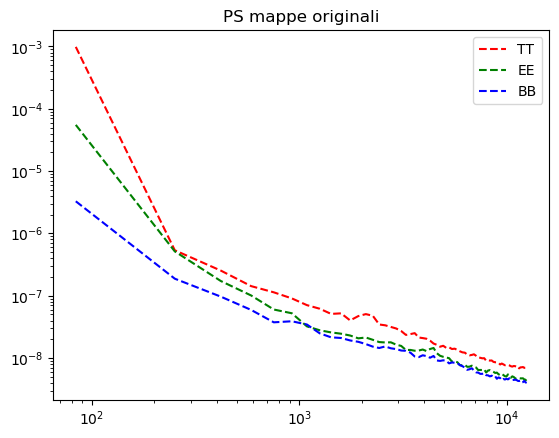

In [304]:
plt.figure()

# mappa originale
plt.title("PS mappe originali")
plt.plot(ells_uncoupled, cl00_uncoupled[0], 'r--', label='TT')
plt.plot(ells_uncoupled, cl22_uncoupled[0], 'g--', label='EE')
plt.plot(ells_uncoupled, cl22_uncoupled[3], 'b--', label='BB')
plt.loglog()
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

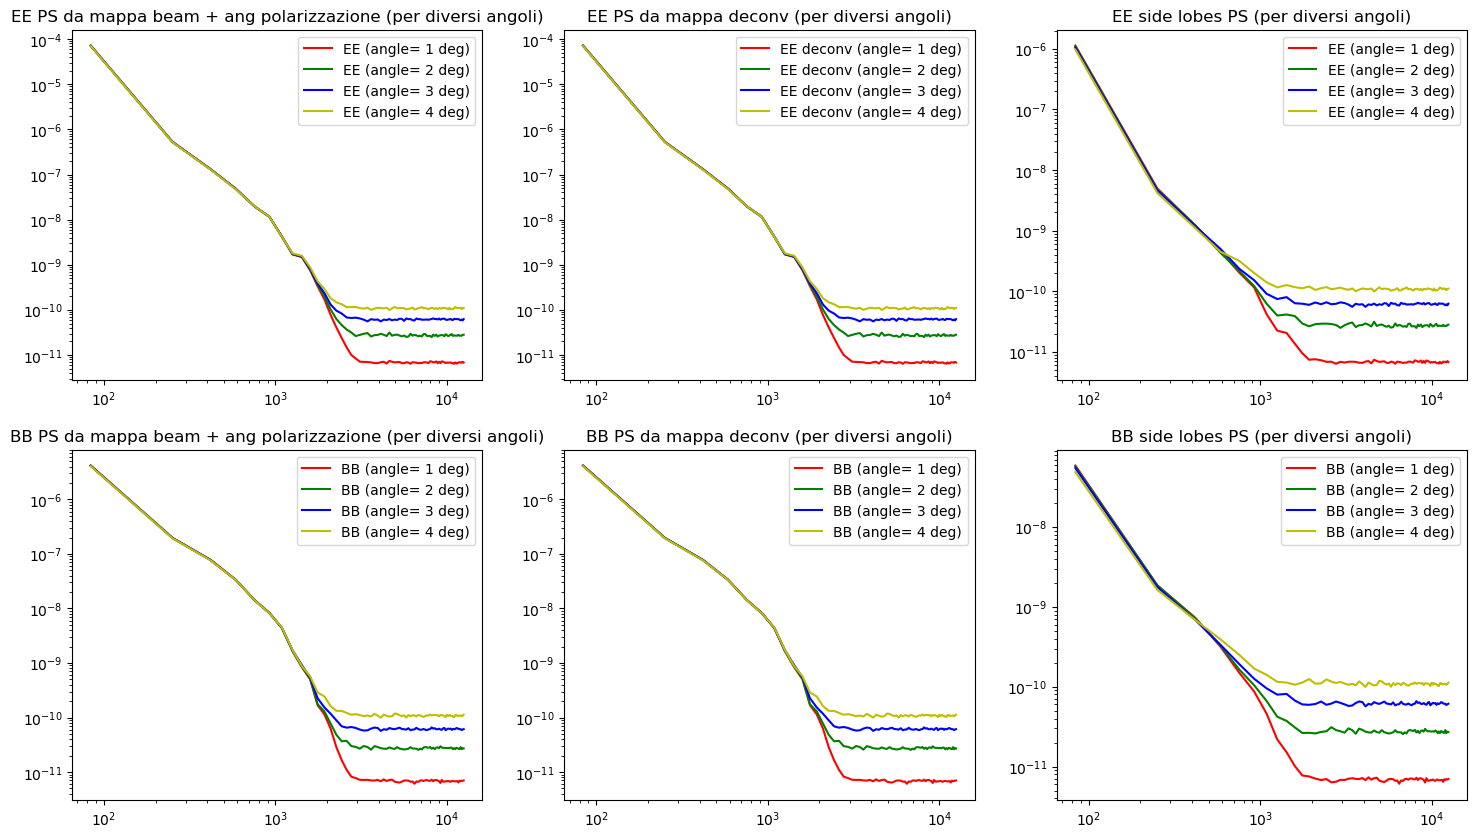

In [318]:
plt.figure()
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# angolo di polarizzazione
#plt.title("PS a diversi angoli di polarizzazione")

# questo non ha senso rappresentarlo perchè l'angolo di polarizzazione non è aplicato su I
#axs[0].plot(ells_uncoupled, cl00_uncoupled_pol1[0], 'r-', label='TT (angle 1)')
#axs[0].plot(ells_uncoupled, cl00_uncoupled_pol2[0], 'g-', label='TT (angle 2)')
#axs[0].plot(ells_uncoupled, cl00_uncoupled_pol3[0], 'b-', label='TT (angle 3)')
#axs[0].plot(ells_uncoupled, cl00_uncoupled_pol4[0], 'y-', label='TT (angle 4)')


# EE
axs[0,0].set_title("EE PS da mappa beam + ang polarizzazione (per diversi angoli)")
axs[0,0].plot(ells_uncoupled, cl22_uncoupled_pol1[0], 'r-', label='EE (angle= 1 deg)')
axs[0,0].plot(ells_uncoupled, cl22_uncoupled_pol2[0], 'g-', label='EE (angle= 2 deg)')
axs[0,0].plot(ells_uncoupled, cl22_uncoupled_pol3[0], 'b-', label='EE (angle= 3 deg)')
axs[0,0].plot(ells_uncoupled, cl22_uncoupled_pol4[0], 'y-', label='EE (angle= 4 deg)')
axs[0,0].legend()
axs[0,0].loglog()

axs[0,1].set_title("EE PS da mappa deconv (per diversi angoli)")
axs[0,1].plot(ells_uncoupled, cl22_uncoupled_deconv1[0], 'r-', label='EE deconv (angle= 1 deg)')
axs[0,1].plot(ells_uncoupled, cl22_uncoupled_deconv2[0], 'g-', label='EE deconv (angle= 2 deg)')
axs[0,1].plot(ells_uncoupled, cl22_uncoupled_deconv3[0], 'b-', label='EE deconv (angle= 3 deg)')
axs[0,1].plot(ells_uncoupled, cl22_uncoupled_deconv4[0], 'y-', label='EE deconv (angle= 4 deg)')
axs[0,1].legend()
axs[0,1].loglog()

axs[0,2].set_title("EE side lobes PS (per diversi angoli)")
axs[0,2].plot(ells_uncoupled, cl22_uncoupled_diff1[0], 'r-', label='EE (angle= 1 deg)')
axs[0,2].plot(ells_uncoupled, cl22_uncoupled_diff2[0], 'g-', label='EE (angle= 2 deg)')
axs[0,2].plot(ells_uncoupled, cl22_uncoupled_diff3[0], 'b-', label='EE (angle= 3 deg)')
axs[0,2].plot(ells_uncoupled, cl22_uncoupled_diff4[0], 'y-', label='EE (angle= 4 deg)')
axs[0,2].legend()
axs[0,2].loglog()




# BB
axs[1, 0].set_title("BB PS da mappa beam + ang polarizzazione (per diversi angoli)")
axs[1, 0].plot(ells_uncoupled, cl22_uncoupled_pol1[3], 'r-', label='BB (angle= 1 deg)')
axs[1, 0].plot(ells_uncoupled, cl22_uncoupled_pol2[3], 'g-', label='BB (angle= 2 deg)')
axs[1, 0].plot(ells_uncoupled, cl22_uncoupled_pol3[3], 'b-', label='BB (angle= 3 deg)')
axs[1, 0].plot(ells_uncoupled, cl22_uncoupled_pol4[3], 'y-', label='BB (angle= 4 deg)')
axs[1, 0].loglog()
axs[1, 0].legend()

axs[1, 1].set_title("BB PS da mappa deconv (per diversi angoli)")
axs[1, 1].plot(ells_uncoupled, cl22_uncoupled_deconv1[3], 'r-', label='BB (angle= 1 deg)')
axs[1, 1].plot(ells_uncoupled, cl22_uncoupled_deconv2[3], 'g-', label='BB (angle= 2 deg)')
axs[1, 1].plot(ells_uncoupled, cl22_uncoupled_deconv3[3], 'b-', label='BB (angle= 3 deg)')
axs[1, 1].plot(ells_uncoupled, cl22_uncoupled_deconv4[3], 'y-', label='BB (angle= 4 deg)')
axs[1, 1].loglog()
axs[1, 1].legend()

axs[1, 2].set_title("BB side lobes PS (per diversi angoli)")
axs[1, 2].plot(ells_uncoupled, cl22_uncoupled_diff1[3], 'r-', label='BB (angle= 1 deg)')
axs[1, 2].plot(ells_uncoupled, cl22_uncoupled_diff2[3], 'g-', label='BB (angle= 2 deg)')
axs[1, 2].plot(ells_uncoupled, cl22_uncoupled_diff3[3], 'b-', label='BB (angle= 3 deg)')
axs[1, 2].plot(ells_uncoupled, cl22_uncoupled_diff4[3], 'y-', label='BB (angle= 4 deg)')
axs[1, 2].loglog()
axs[1, 2].legend()


plt.show()
